In [1]:
import cv2
import numpy as np
from pathlib import Path

from utils import plot_imgs
from jointrecog.experiment import _init_graph
from jointrecog.settings import EXPER_PATH

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
config = {
    'data': {
        'name': 'kaggle_rhd',
        'validation_size': 480,
        'scoremap_variance': 7,
    },
    'model': {
        'name': 'resnet_fc',
        'batch_size': 32,
        'learning_rate': 0.0001,
        'output_kernel': 3,
    }
}
exper_dir = Path(EXPER_PATH, 'resnet_fc').as_posix()

In [8]:
def draw_keypoints(img, kp, color=(0, 255, 0)):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in kp]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)

[05/09/2018 16:14:32 INFO] Number of GPUs detected: 1
[05/09/2018 16:14:32 INFO] Copying
[05/09/2018 16:15:13 INFO] Copied
[05/09/2018 16:15:56 INFO] Restoring parameters from /cluster/home/psarlin/Machine_Perception/Hand-Joint-Recognition/experiments/resnet_fc/model.ckpt-30396


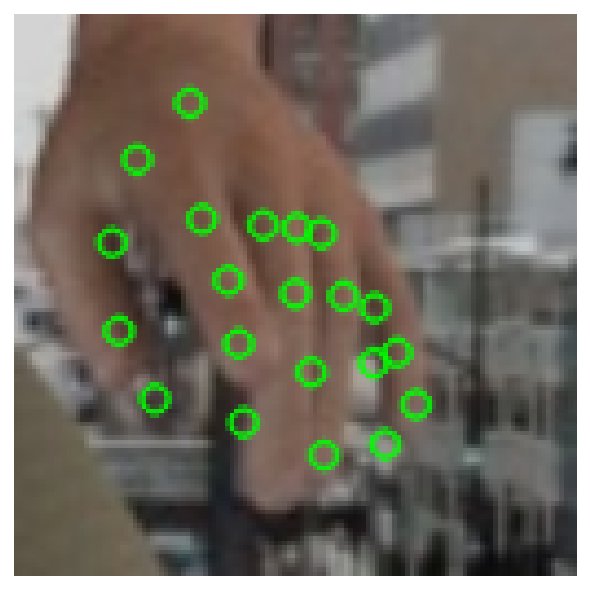

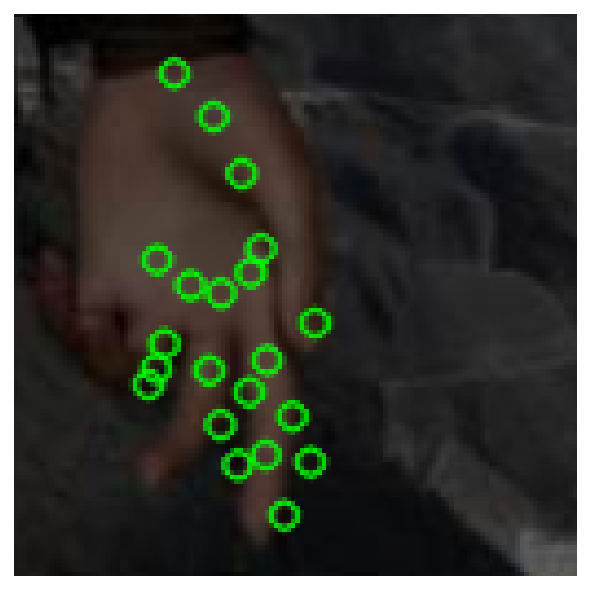

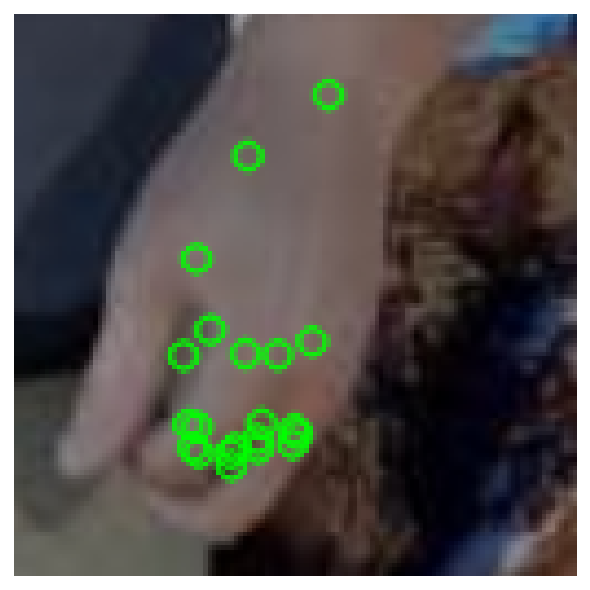

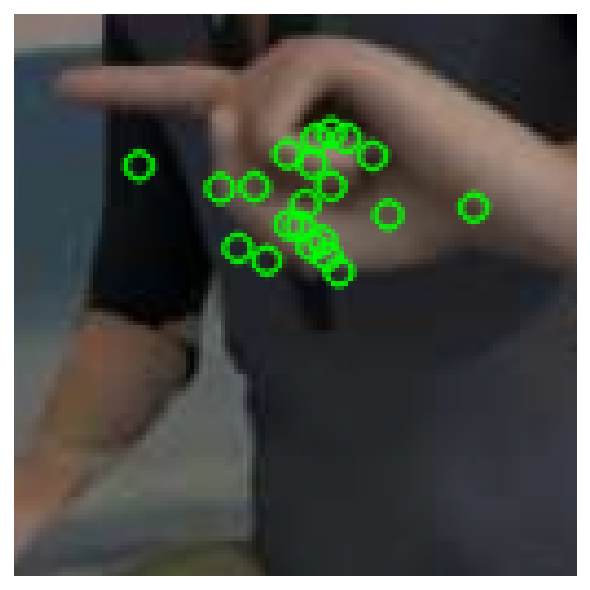

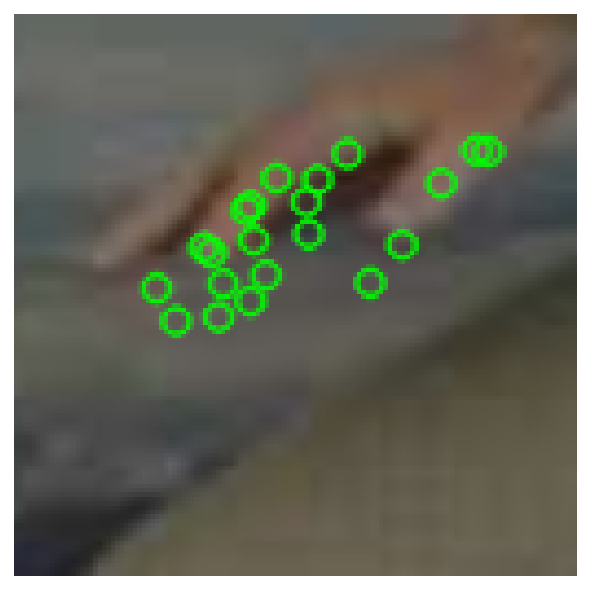

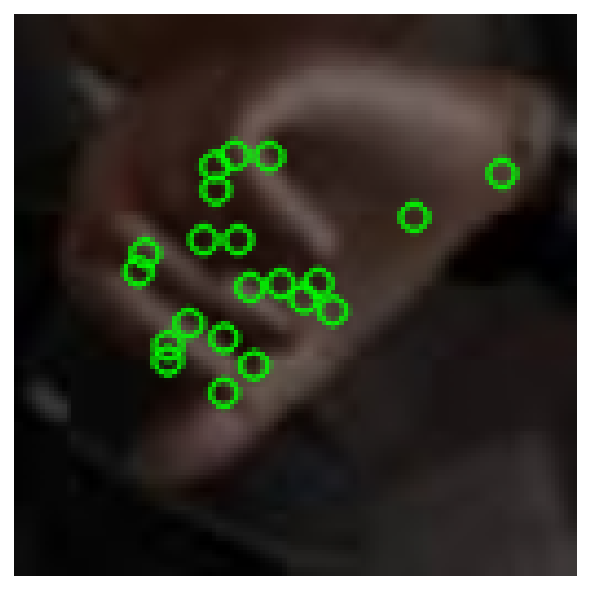

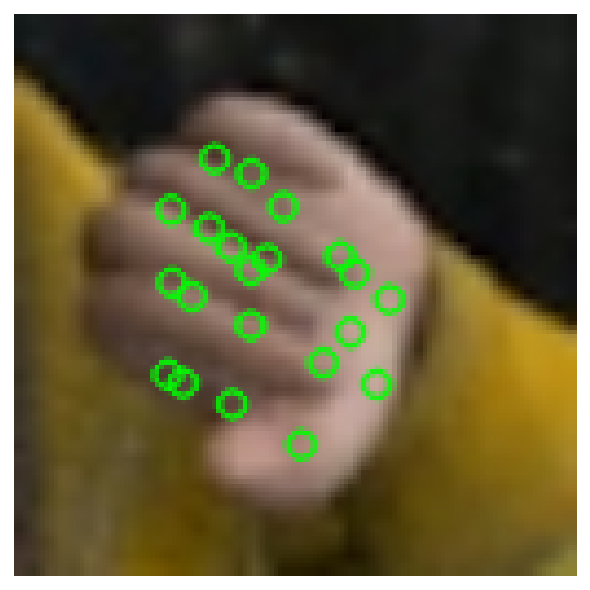

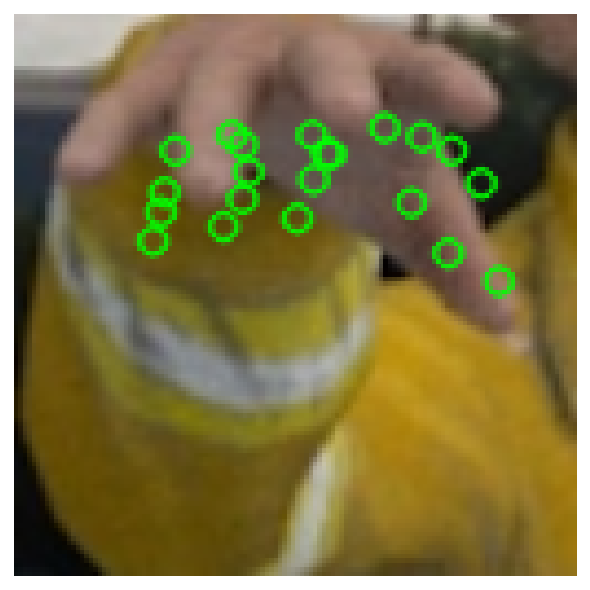

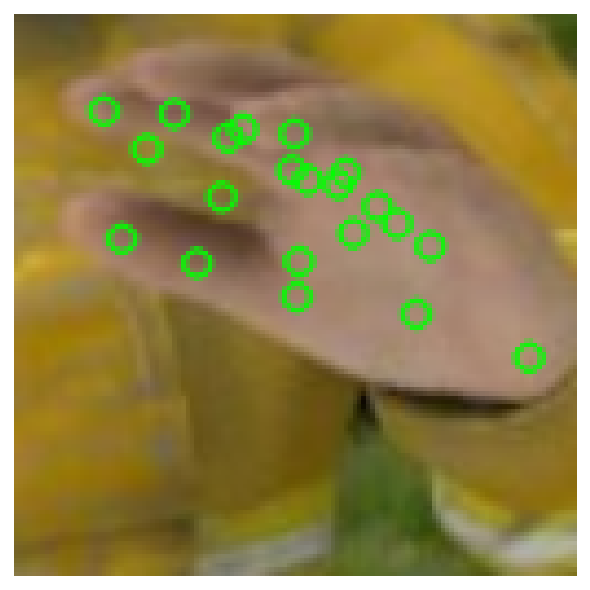

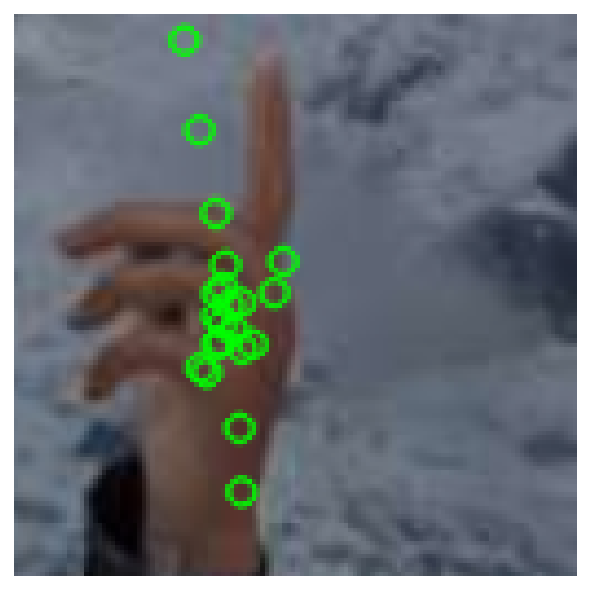

In [11]:
with _init_graph(config, with_dataset=True) as (net, dataset):
    net.load(exper_dir, flexible_restore=False);
    data = dataset.get_test_set()
    for _ in range(10):
        d = next(data)
        p = net.predict(d, keys='*')
#        print(np.sum(np.square(p['keypoints']-d['keypoints']), axis=(0,1))/21)
        plot_imgs([draw_keypoints(d['image'], p['keypoints'])/255.])
#                   np.max(d['scoremap'], axis=-1)], cmap=[None, 'jet'])
#                   np.max(p['scoremap'], axis=-1)], cmap=[None, 'jet', 'jet'])

[05/09/2018 16:08:08 INFO] Number of GPUs detected: 1
[05/09/2018 16:08:08 INFO] Copying
[05/09/2018 16:09:01 INFO] Copied
[05/09/2018 16:09:37 INFO] Restoring parameters from /cluster/home/psarlin/Machine_Perception/Hand-Joint-Recognition/experiments/resnet_fc/model.ckpt-30396


66.1145949591
20.331304641
52.3740234375
29.3844313849
13.0663641067
112.559907459
16.7502441406
17.7614615304
16.7291390555
10.9652056013


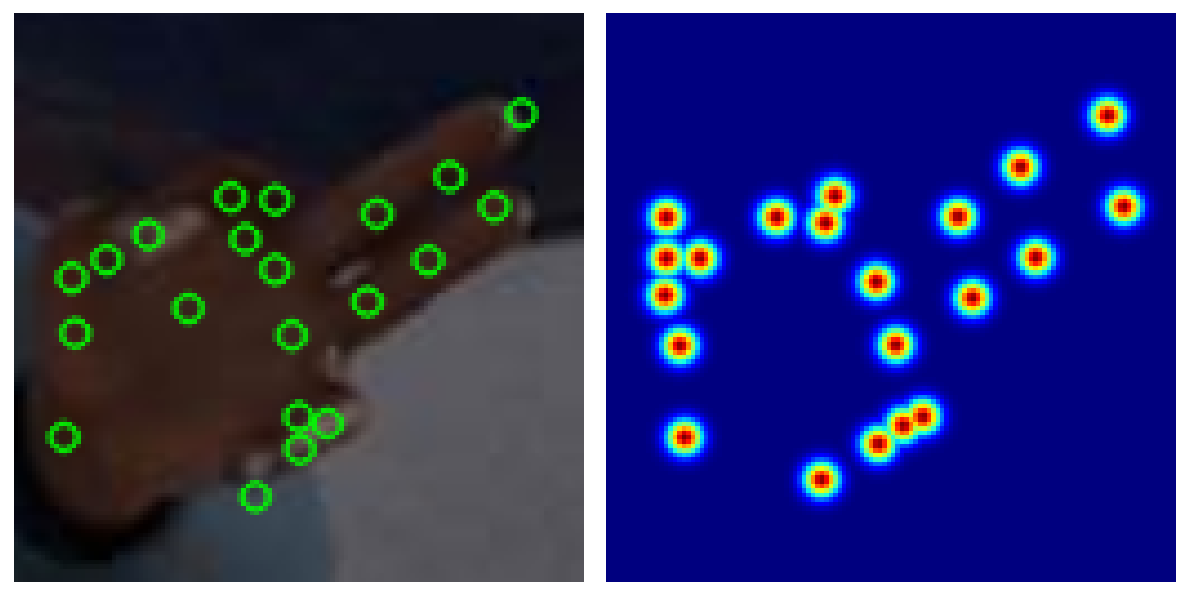

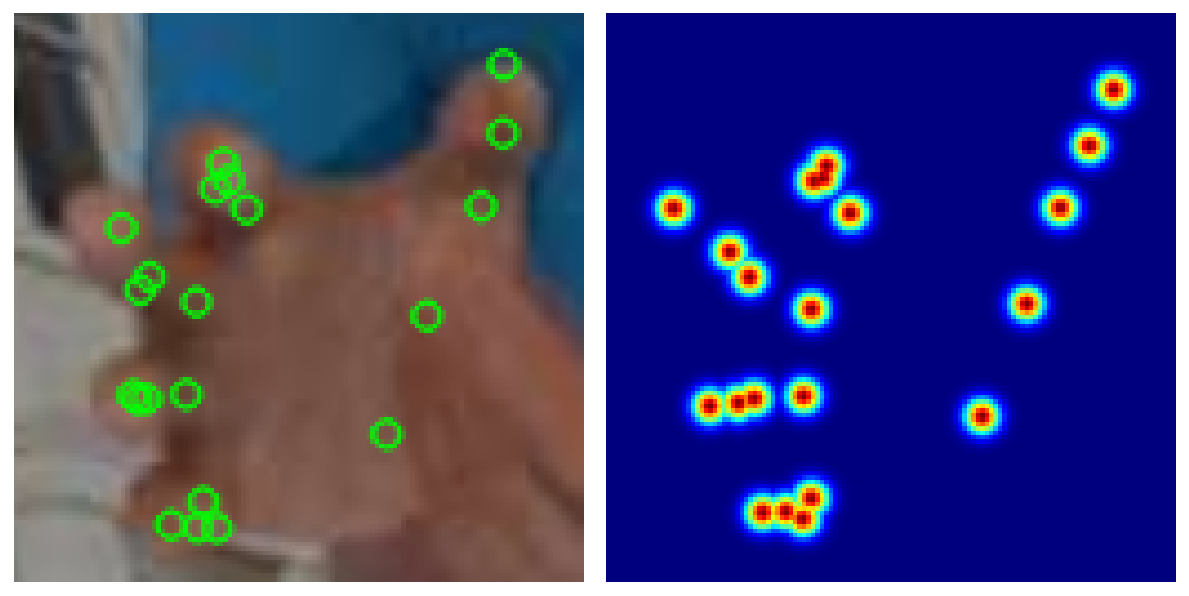

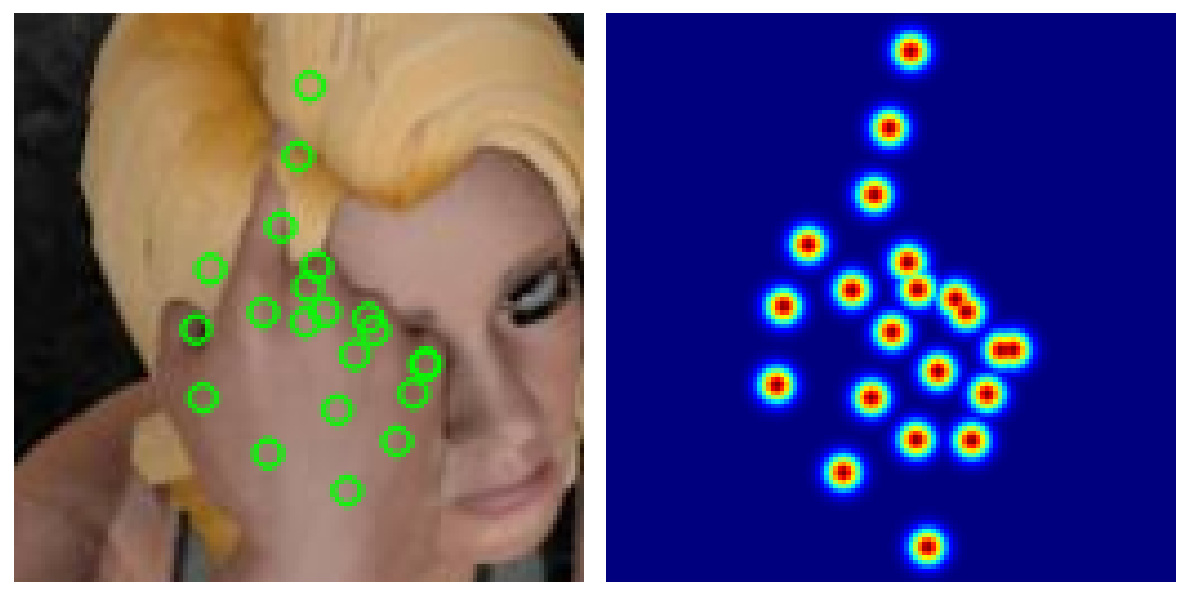

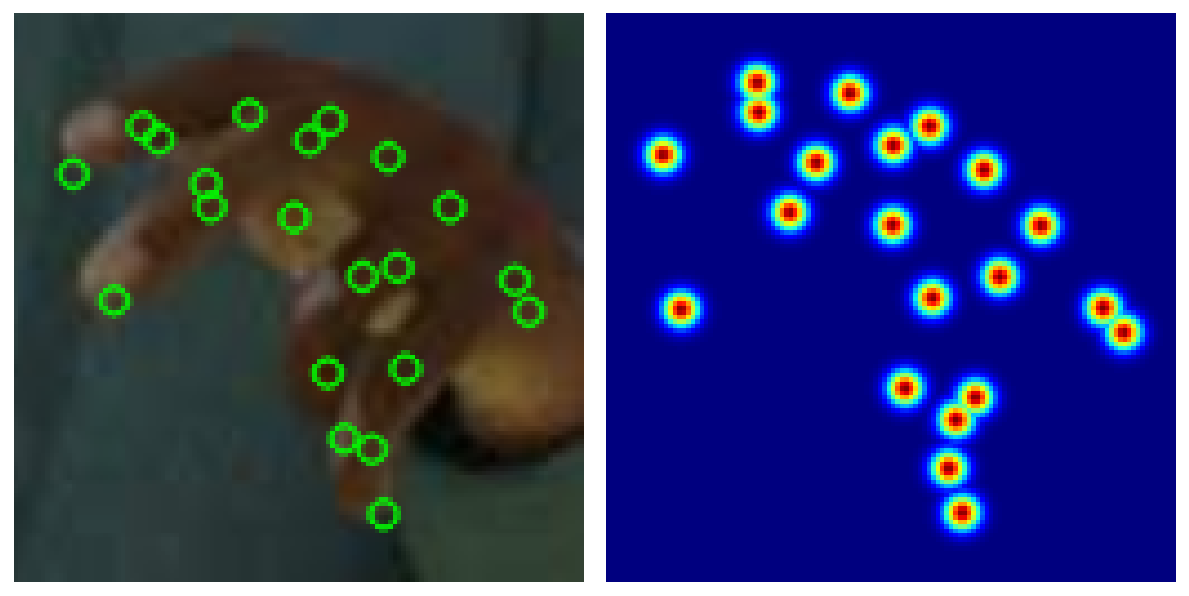

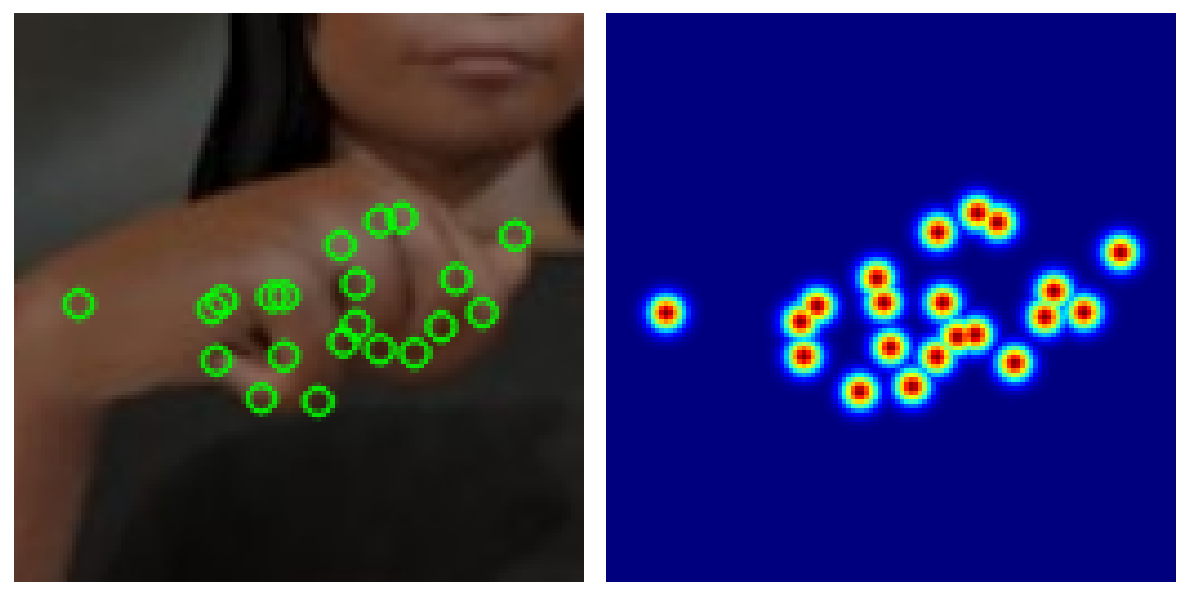

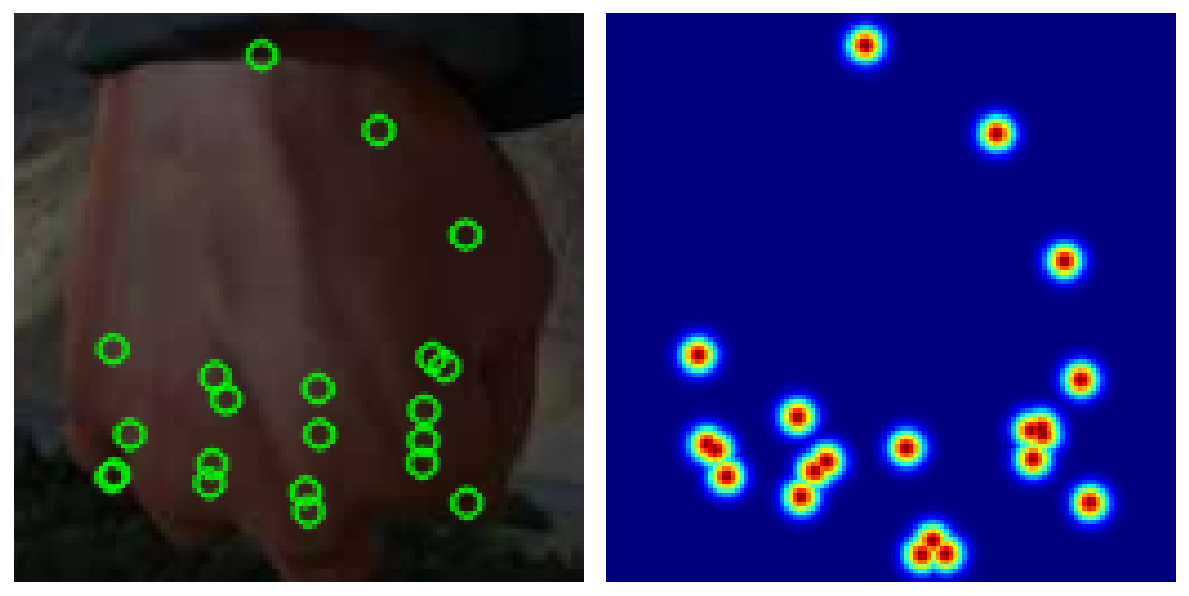

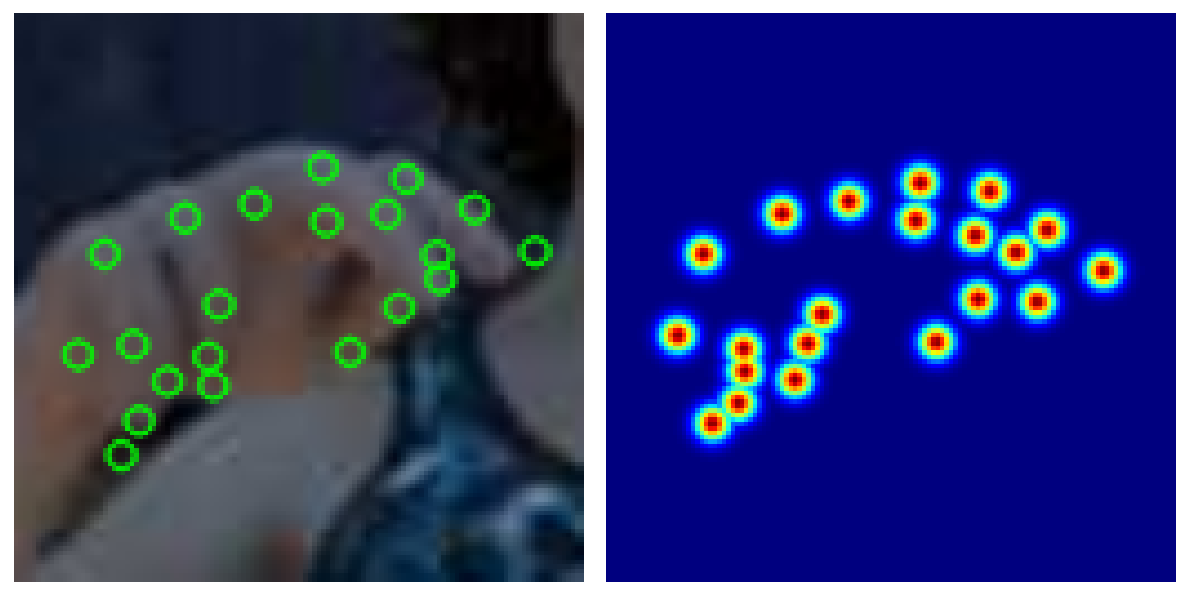

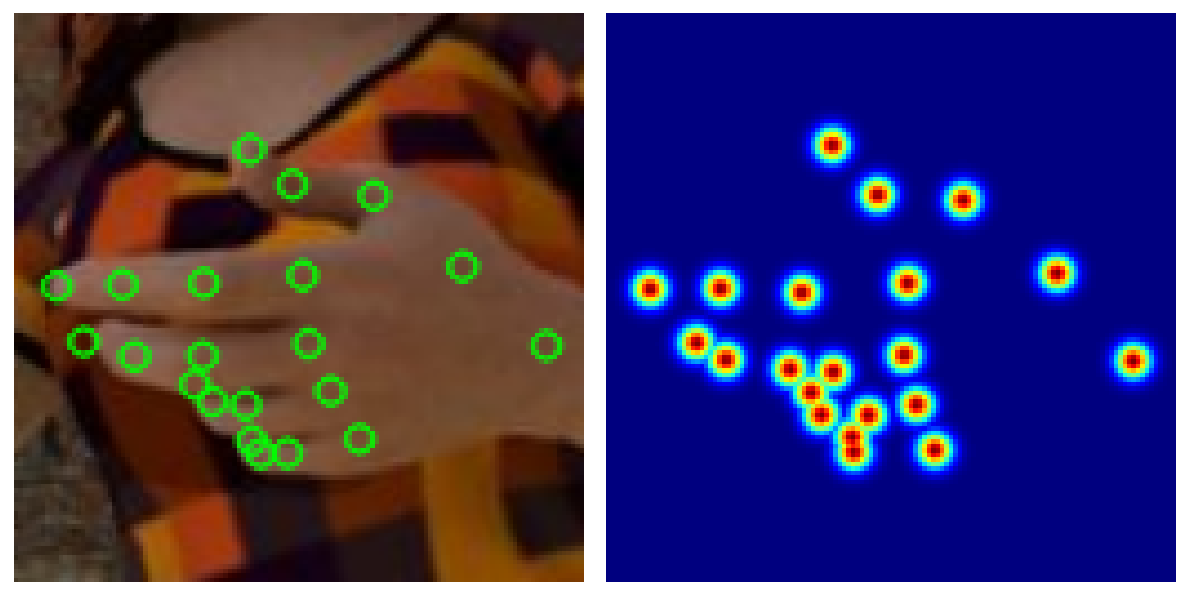

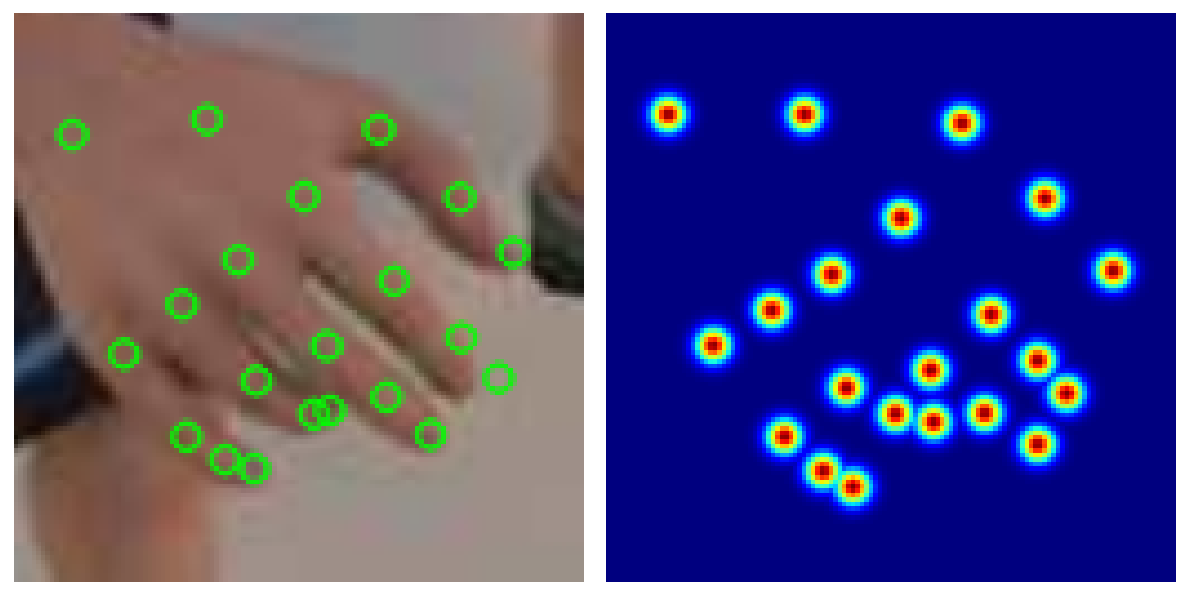

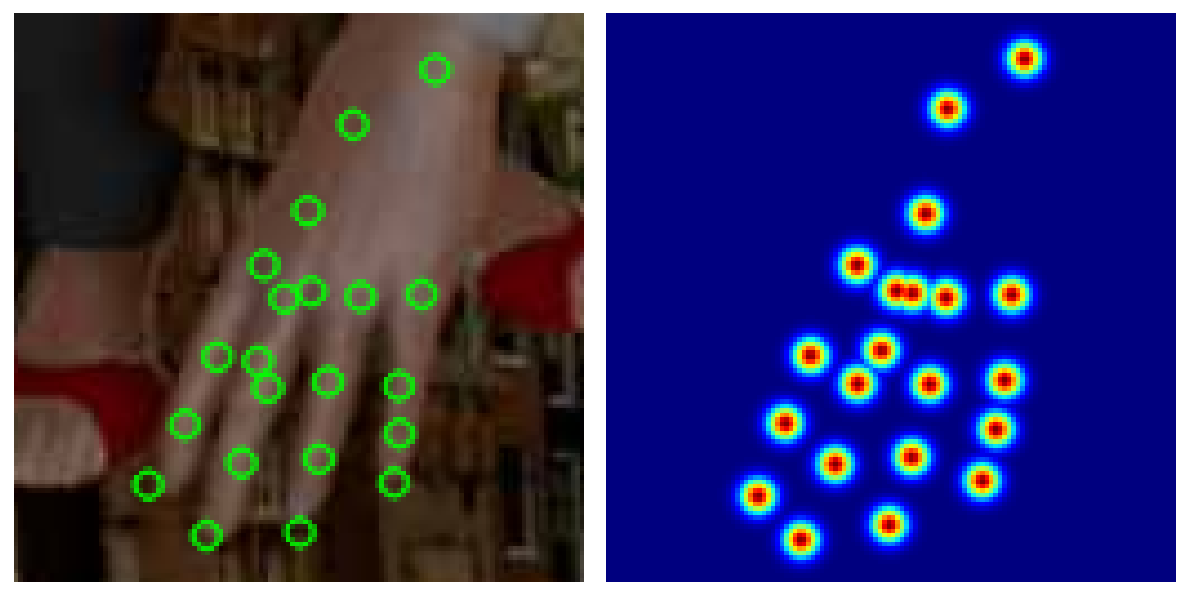

[05/09/2018 08:43:29 INFO] Number of GPUs detected: 1
[05/09/2018 08:43:29 INFO] Copying
[05/09/2018 08:44:02 INFO] Copied
[05/09/2018 08:44:19 INFO] Restoring variables: 
	convOut/biases
	convOut/weights
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/beta
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/gamma
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/moving_mean
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/BatchNorm/moving_variance
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv1/weights
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv2/BatchNorm/beta
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv2/BatchNorm/gamma
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv2/BatchNorm/moving_mean
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv2/BatchNorm/moving_variance
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv2/weights
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv3/biases
	resnet_v2_50/block1/unit_1/bottleneck_v2/conv3/weights
	resnet_v2_50/block1/unit_1/bo

[05/09/2018 08:44:19 INFO] Restoring parameters from /cluster/home/psarlin/Machine_Perception/Hand-Joint-Recognition/experiments/resnet_baseline_block1/model.ckpt-200000


29211.4
30491.6
17816.7
19983.8
8064.4
49693.1
14629.7
12946.6
12334.8
16059.8


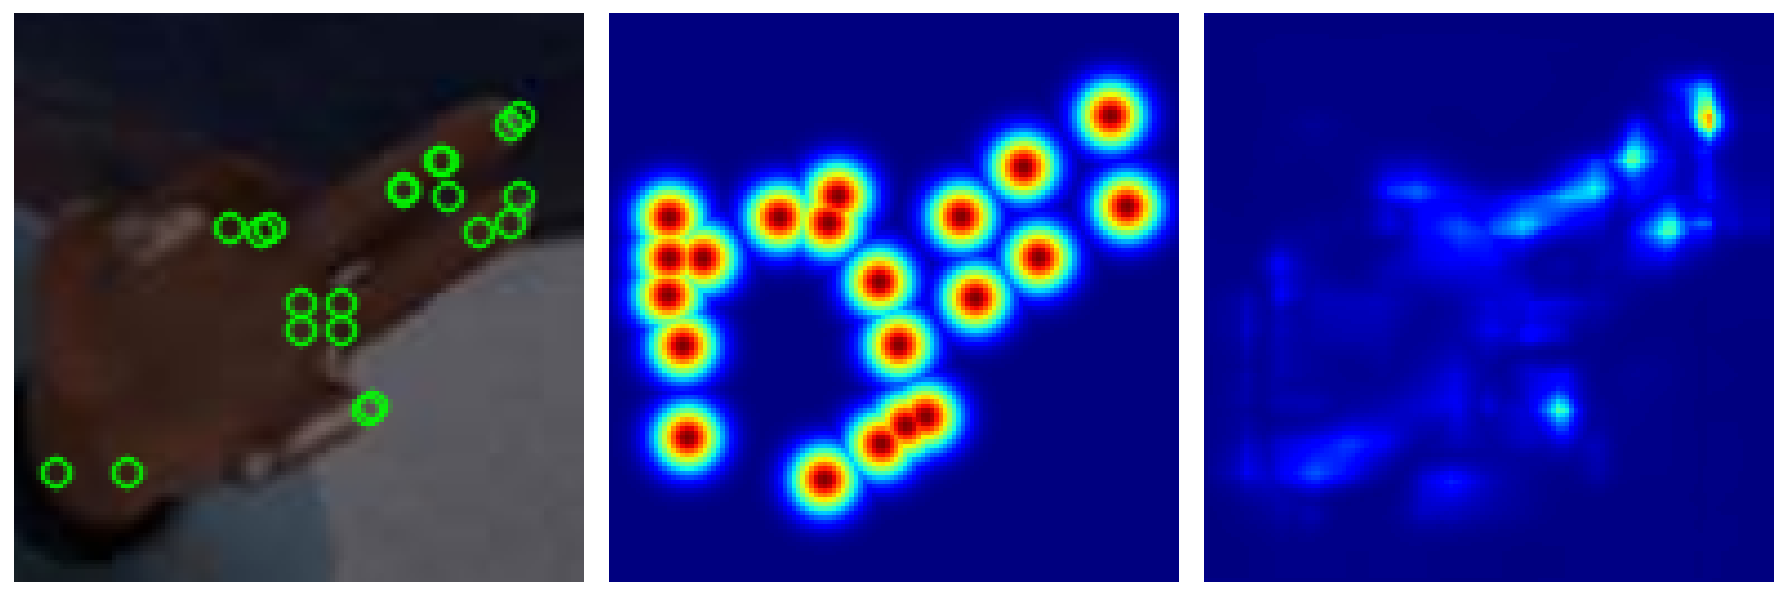

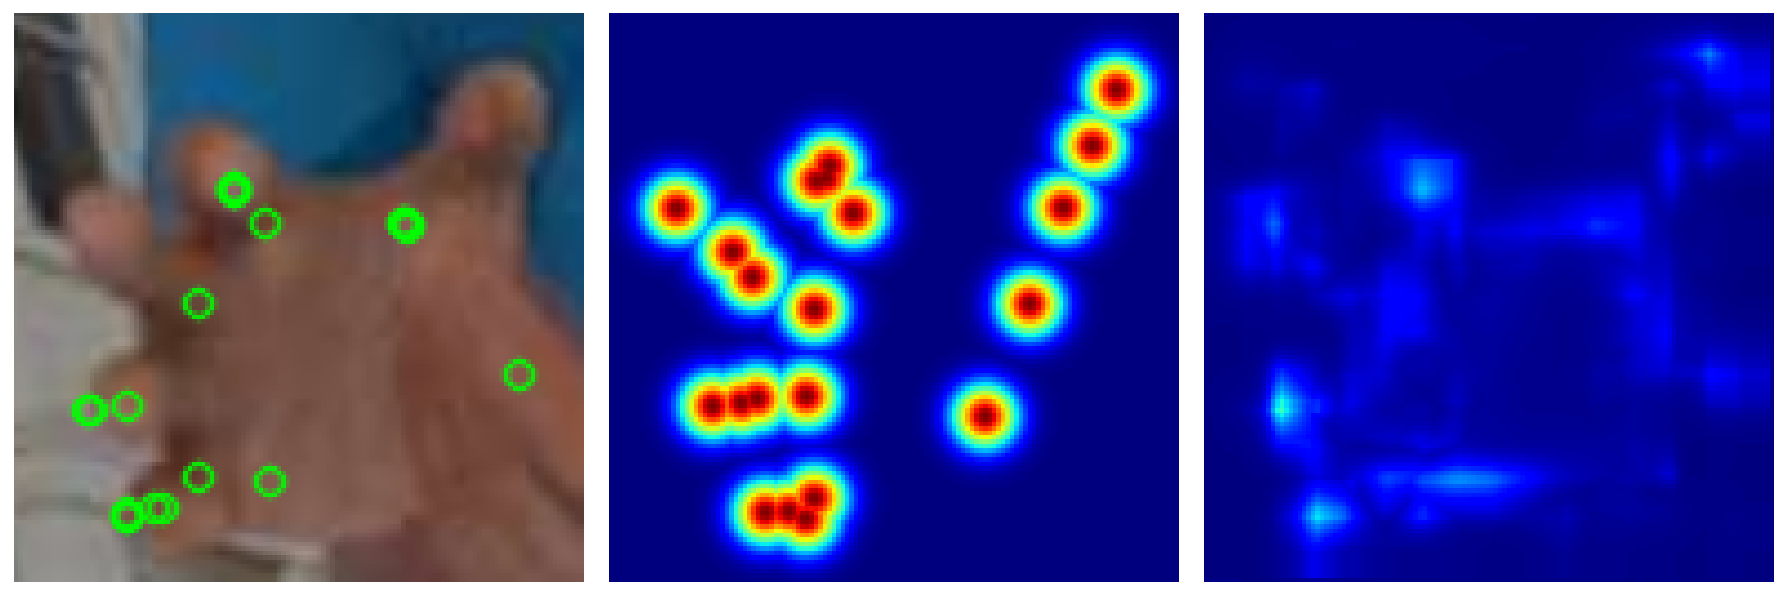

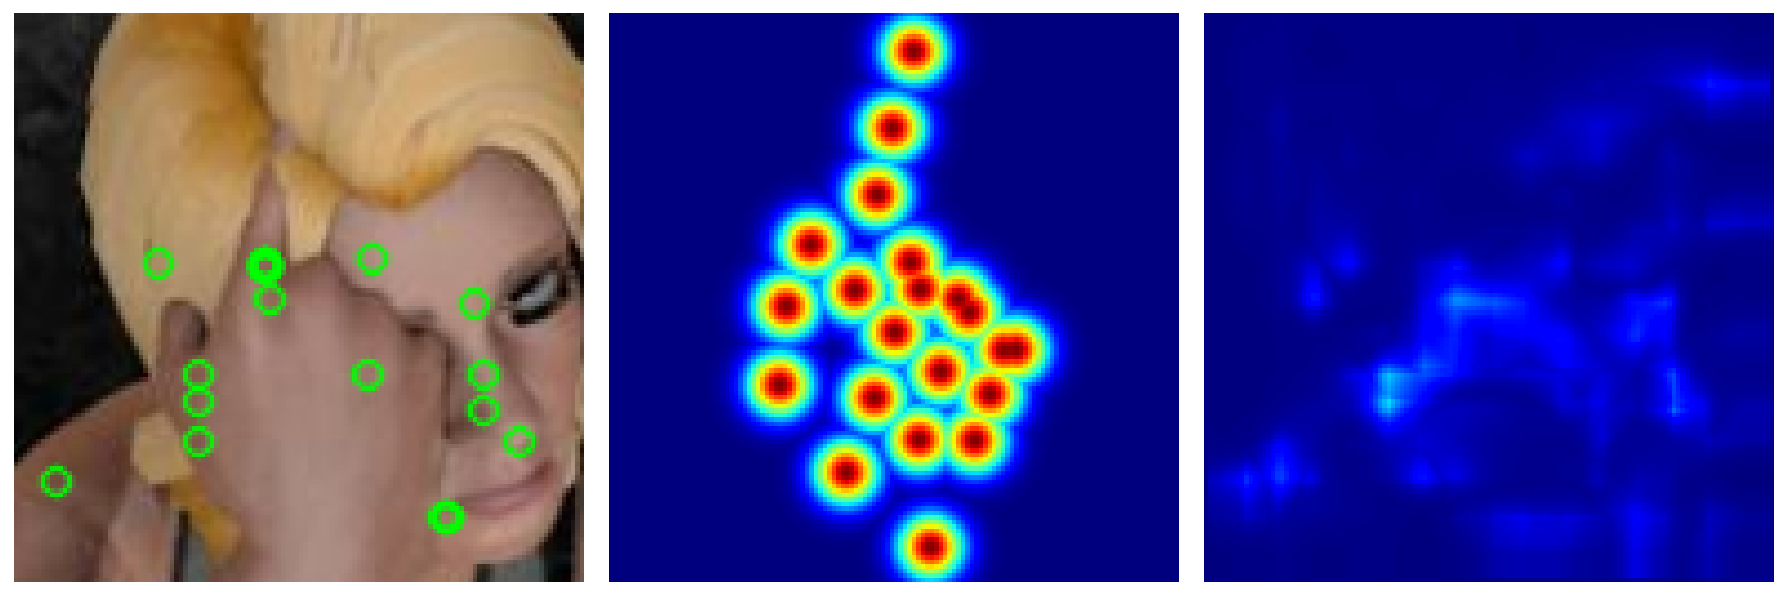

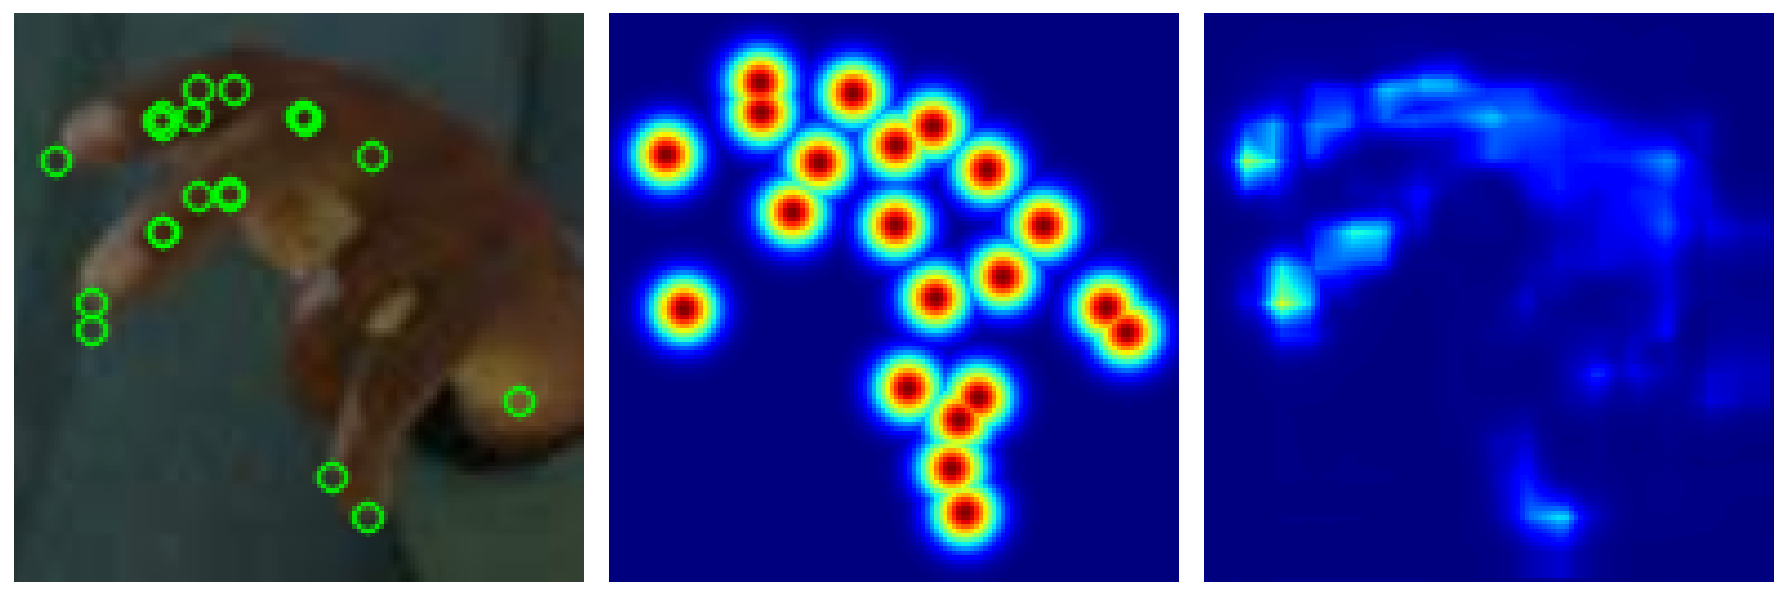

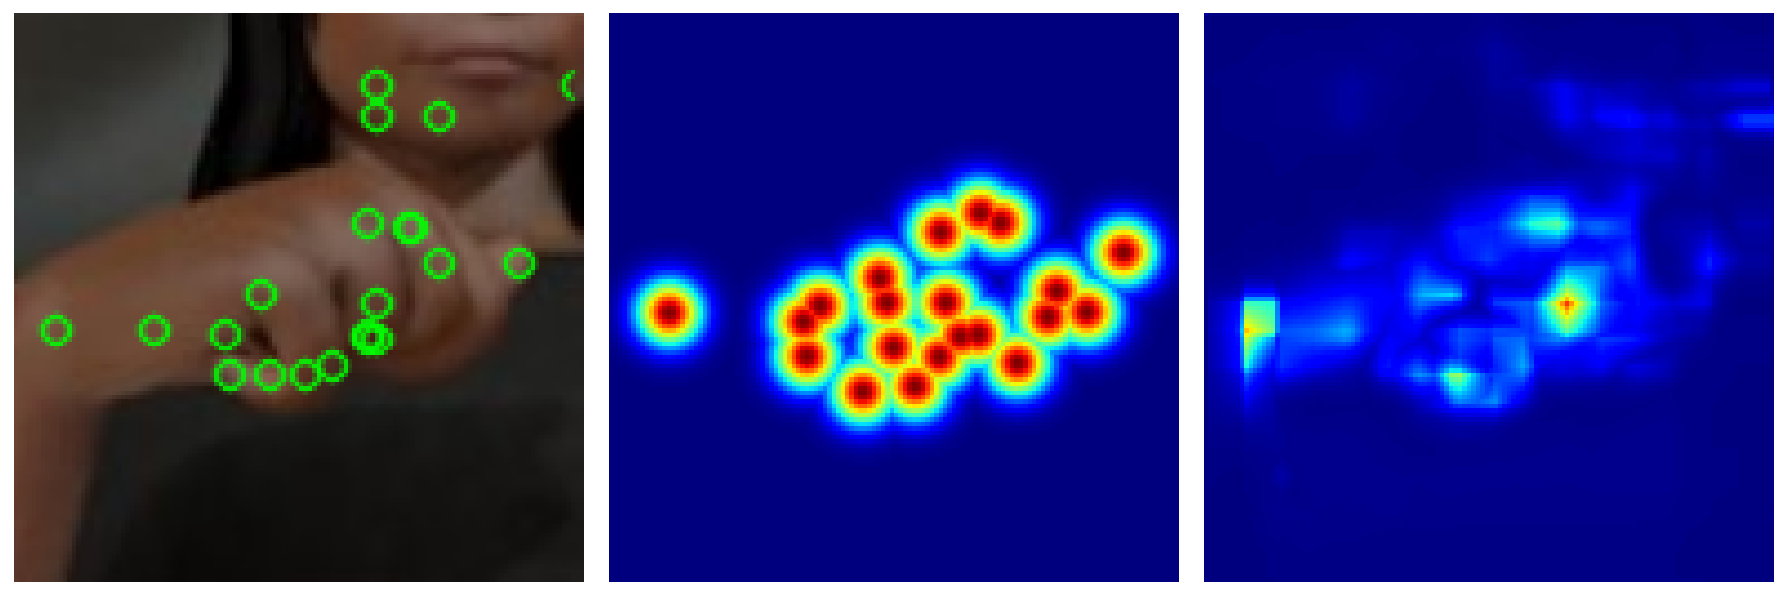

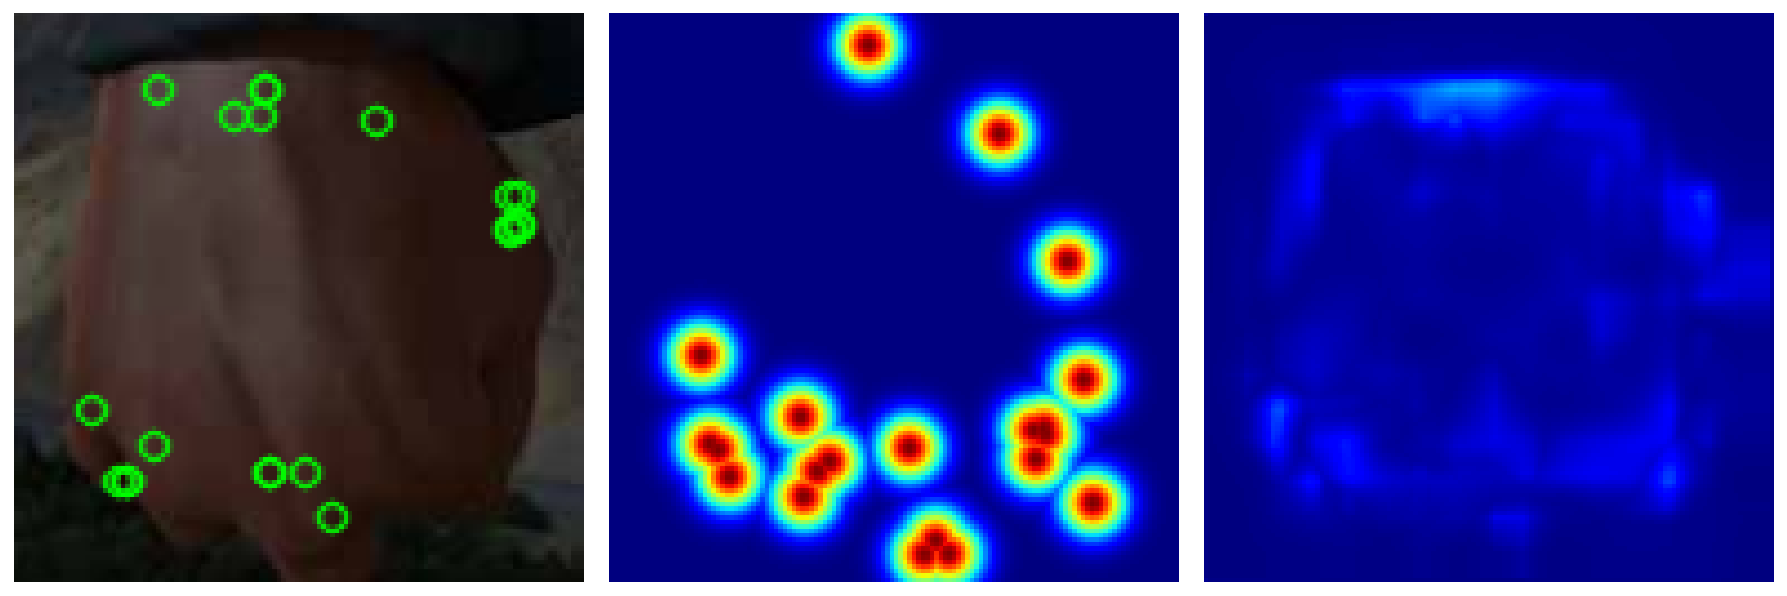

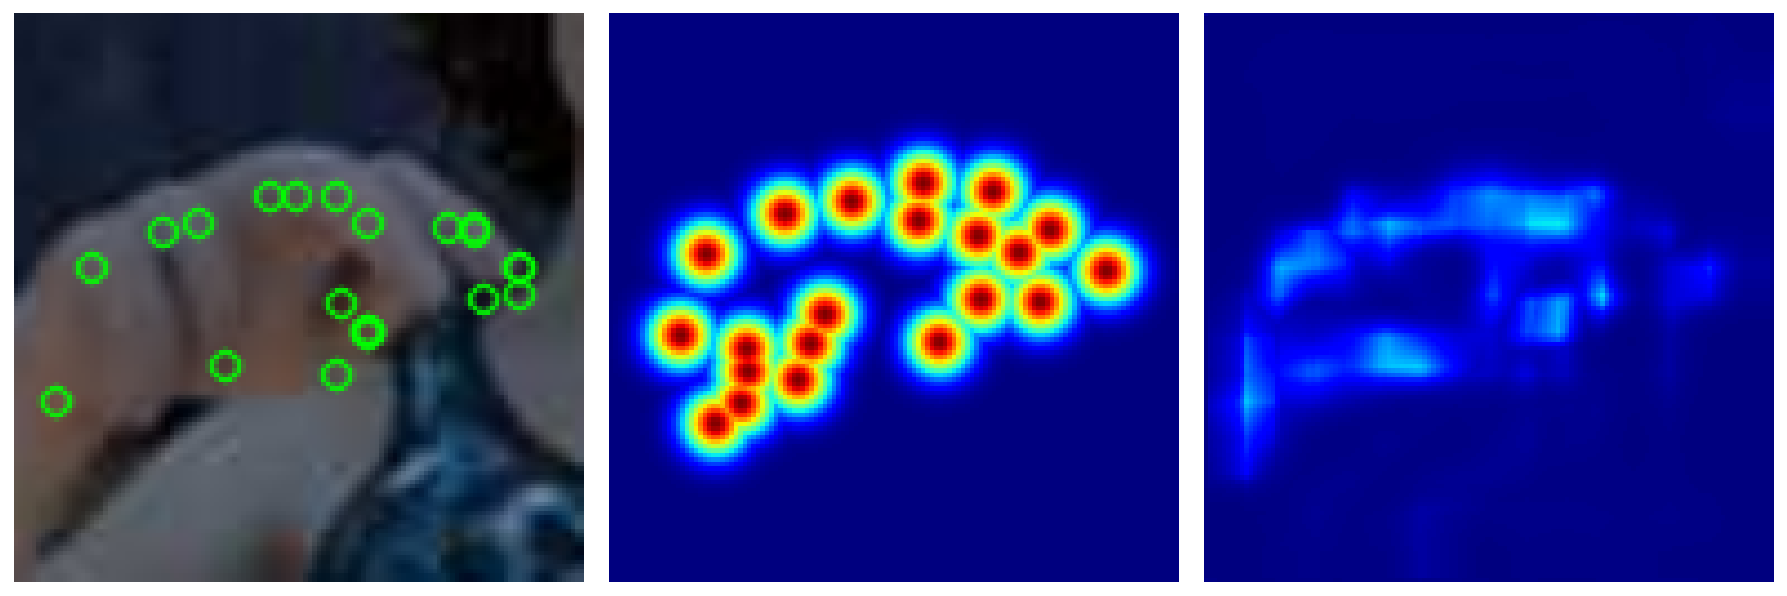

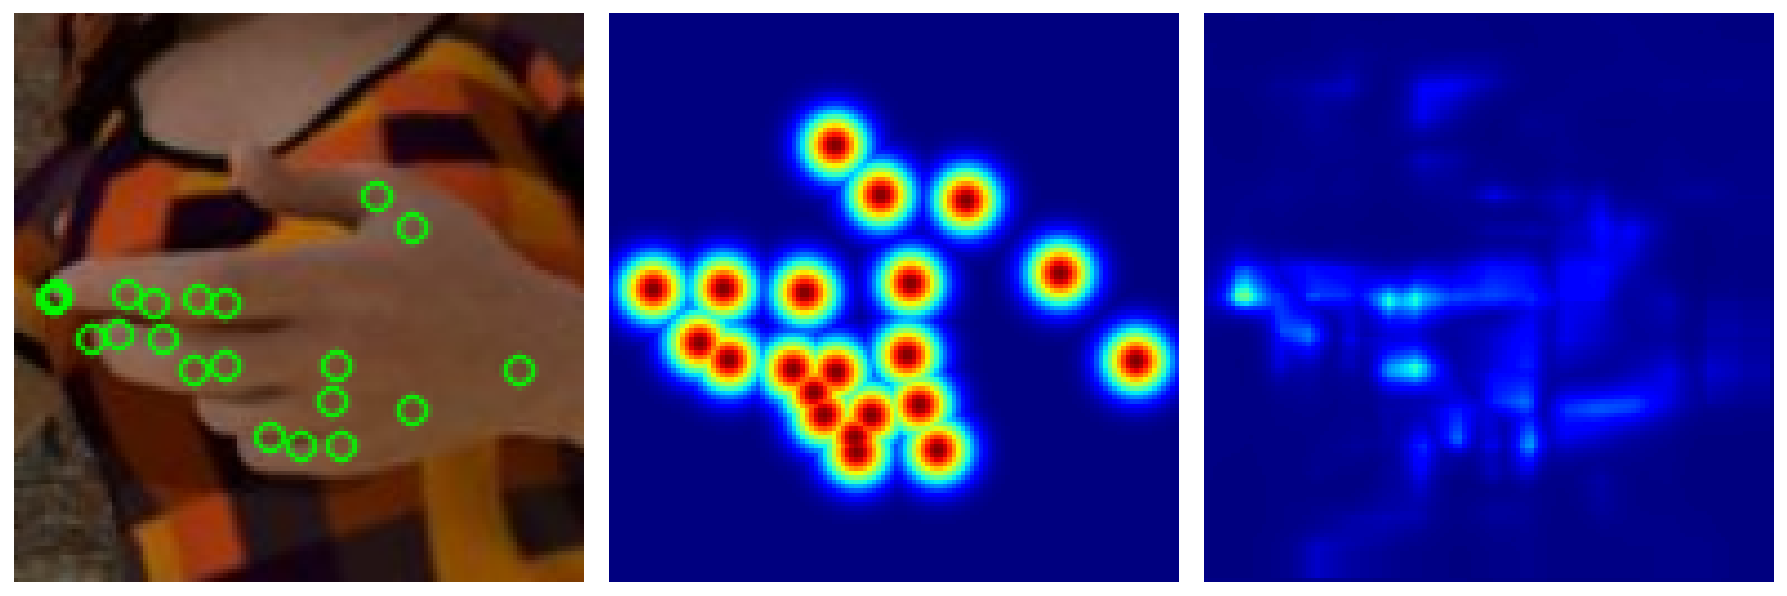

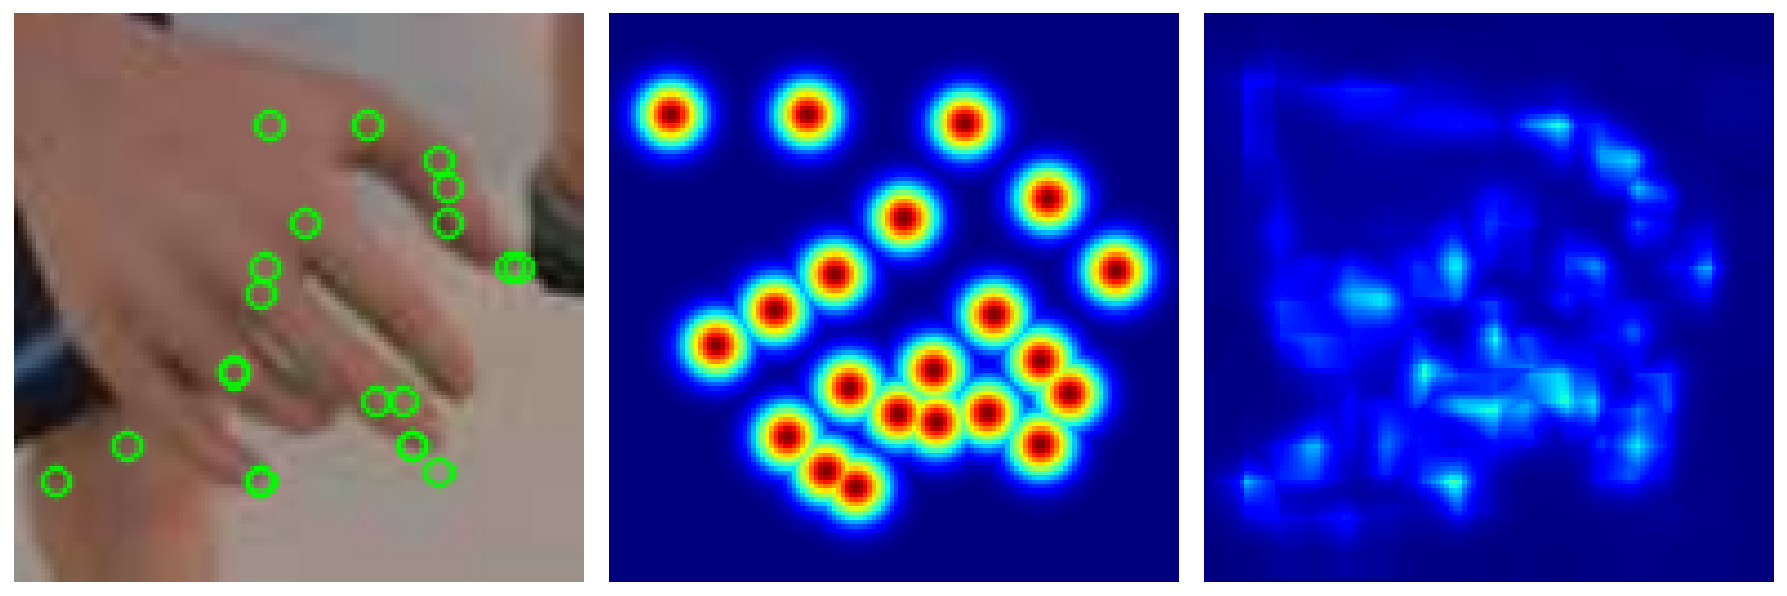

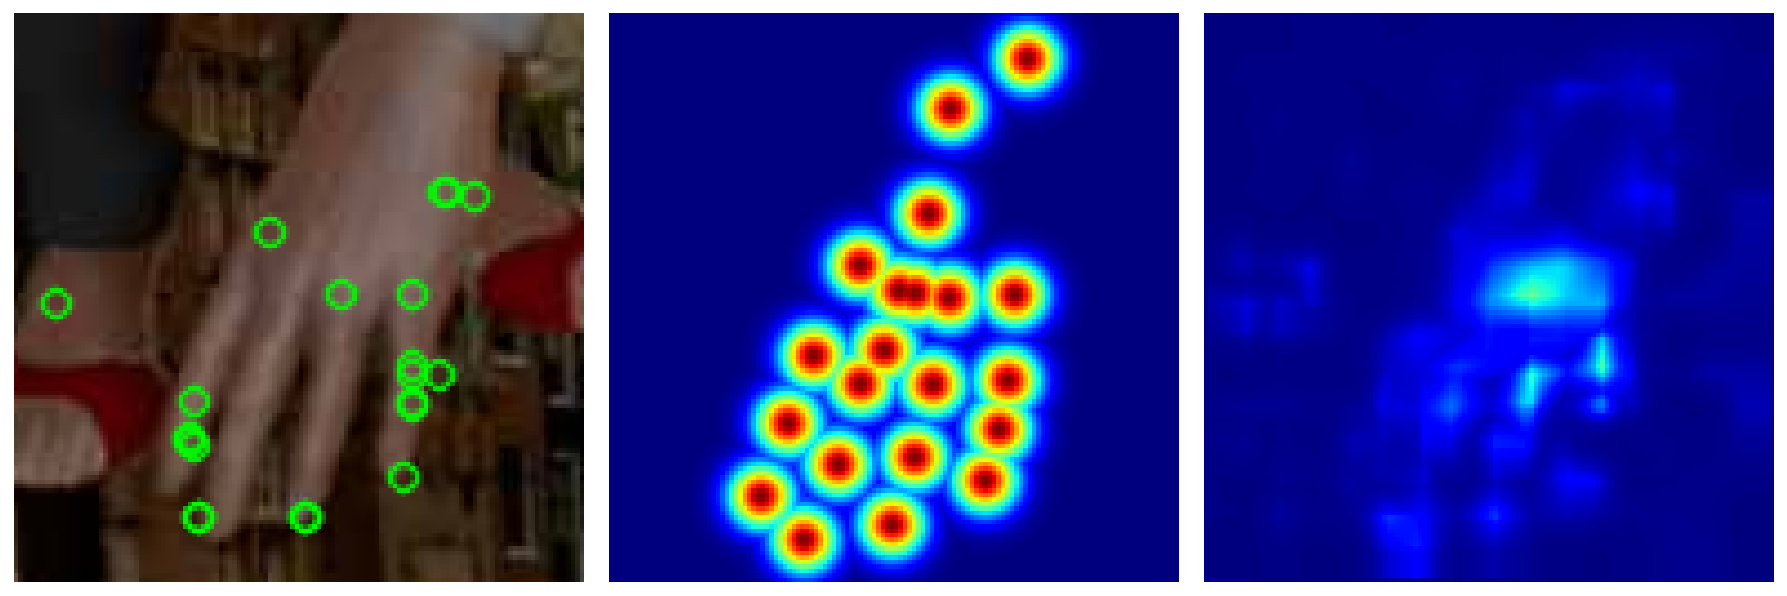

In [9]:
np.min(p['expectations'], axis=0)

array([ 49.29623413,  60.11979294], dtype=float32)

In [10]:
np.max(p['expectations'], axis=0)

array([ 84.41571045,  71.99634552], dtype=float32)

In [15]:
p['maxscores']

array([[  65.,    9.],
       [ 104.,   87.],
       [  97.,   40.],
       [  41.,  103.],
       [  40.,   96.],
       [ 113.,   41.],
       [  96.,   39.],
       [  87.,   40.],
       [  49.,   57.],
       [ 113.,   41.],
       [  88.,   89.],
       [  81.,   89.],
       [  63.,   89.],
       [ 113.,   65.],
       [  87.,   89.],
       [  79.,   89.],
       [  63.,   73.],
       [ 113.,   65.],
       [  95.,   39.],
       [  81.,   95.],
       [  40.,   97.]], dtype=float32)

In [6]:
p['expectations']

array([[ 54.66524887,  60.11979294],
       [ 63.19463348,  66.31520081],
       [ 57.90497589,  67.40685272],
       [ 49.29623413,  71.99634552],
       [ 49.78303528,  70.53812408],
       [ 77.12428284,  68.69167328],
       [ 66.64887238,  63.38679886],
       [ 61.92483139,  66.52407837],
       [ 54.23987579,  67.05216217],
       [ 84.41571045,  69.46891022],
       [ 77.26835632,  67.0341568 ],
       [ 72.323349  ,  66.03556061],
       [ 61.81132507,  68.02587891],
       [ 82.99120331,  67.85808563],
       [ 78.46773529,  66.43422699],
       [ 75.43131256,  68.28160858],
       [ 62.82013321,  71.42657471],
       [ 80.73081207,  67.37184143],
       [ 69.82337952,  65.16668701],
       [ 63.24941254,  67.89720917],
       [ 51.06769943,  69.36058044]], dtype=float32)

In [5]:
d['keypoints']

array([[  71.44186401,  115.79535675],
       [  15.33023739,   33.4883728 ],
       [  33.33952713,   46.73487473],
       [  47.33023834,   63.85115433],
       [  58.93954468,   87.96279907],
       [  31.55348396,   12.35349274],
       [  22.02791214,   33.78604126],
       [  17.71161842,   54.3255806 ],
       [  25.15347862,   72.18604279],
       [  66.2325592 ,   16.3720932 ],
       [  44.50231552,   40.78138733],
       [  29.46977234,   64.        ],
       [  34.97674561,   84.39069366],
       [  91.08837128,   78.139534  ],
       [  83.94417572,   66.67907715],
       [  63.70233154,   72.78138733],
       [  47.47906113,   97.19070435],
       [ 111.92557526,   79.47905731],
       [ 101.95349121,   76.50231934],
       [  86.02790833,   82.45580292],
       [  65.93489075,  111.18138885]], dtype=float32)

In [6]:
np.sum(np.square(p['expectations']-d['keypoints']), axis=(0,1))

45065.652